# Program - plotting 2D countour with matplotlib

**Purpose**
- Learn to use matplotlib to plot 2D contour

**Content**

**Author:** Yi-Hsuan Chen (yihsuan@umich.edu)

**Date:** 

**Reference:** 

- matplotlib demo
  - Contour Demo, https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html
  - Contourf Demo, https://matplotlib.org/stable/gallery/images_contours_and_fields/contourf_demo.html

- Colors
  - Colormaps in Matplotlib, https://matplotlib.org/stable/tutorials/colors/colormaps.html

- Nice examples
  - https://education.molssi.org/python-visualization/matplotlib/contour.html
  - https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html



In [1]:
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import io, os, sys, types

import yhc_module as yhc

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation

## Create sample data

In [2]:
#--- X, Y, Z

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 7, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y) * 100.

In [3]:
#--- from SCM

#--- open SCM file
datapath = "../data/"
filename_scm = "20030701.atmos_cgils.nc"
file_scm = datapath+"/"+filename_scm

da_scm = xr.open_dataset(file_scm)

#da_scm.temp

## Plot 2D contour filled colors

Text(0, 0.5, 'yy')

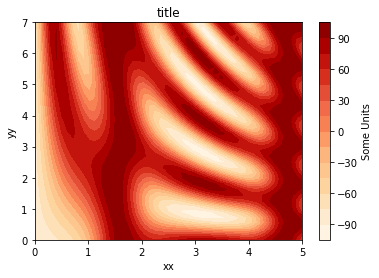

In [4]:
fig, ax = plt.subplots()

#--- determine contour levels
#cn_levels = np.array([-100., -50., -20., 0., 20., 50., 100.])
cn_levels = np.linspace(-100., 100., 10)

#--- plot contour
#      colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
plot_cn = ax.contourf(X, Y, Z, 15, cmap="OrRd")  # automatically 10 levels  reversed cmap "OrRd_r"
#plot_cn = ax.contourf(X, Y, Z, levels = cn_levels)  # use explicit levels

#--- set label bar
fig.colorbar(plot_cn, orientation='vertical', label='Some Units')
#fig.colorbar(plot_cn, orientation='horizontal', label='Some Units', pad=0.2)

#for c in plot_cn.collections:
#    c.set_rasterized(True)
    
#--- set X & Y labels
ax.set_title("title")
ax.set_xlabel("xx")
ax.set_ylabel("yy")

## Plot 2D contour filled colors in subplots

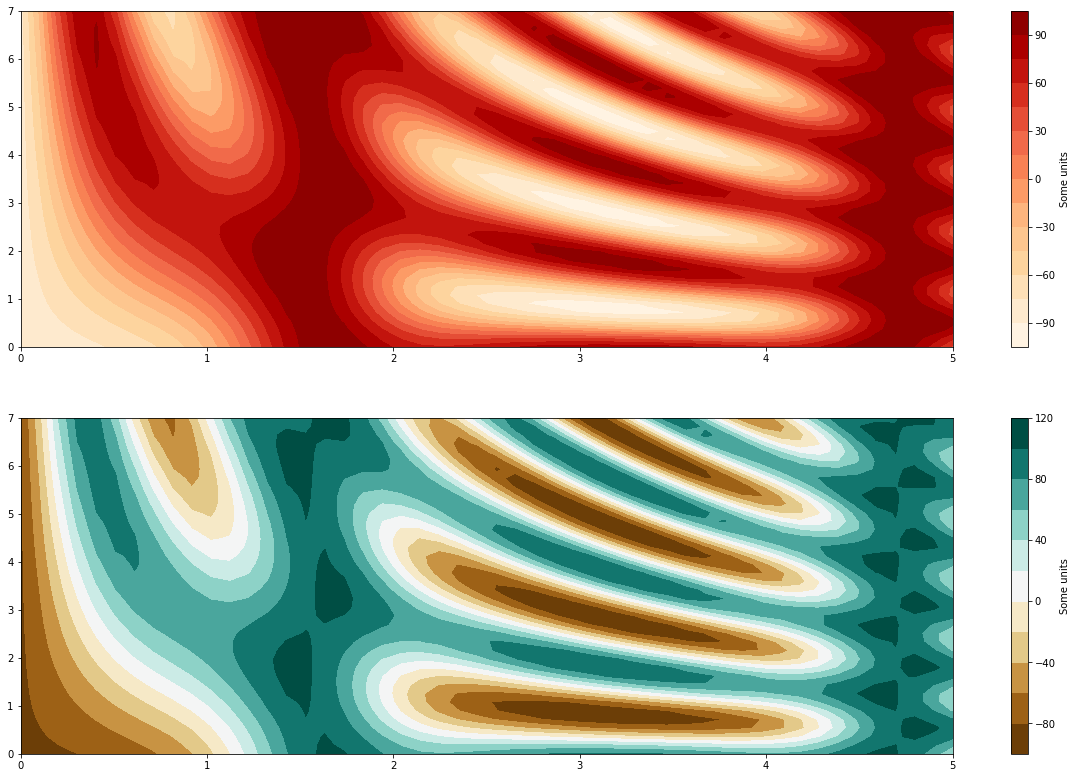

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(18, 12))   # 2 row, 1 column
fig.tight_layout(pad=5.0)

#--- ax1
plot_cn1 = ax1.contourf(X, Y, Z, 15, cmap="OrRd")  # automatically 10 levels  reversed cmap "OrRd_r"
fig.colorbar(plot_cn1, ax=ax1, orientation='vertical', label='Some units')

#--- ax2
plot_cn2 = ax2.contourf(X, Y, Z, 10, cmap="BrBG")  # automatically 10 levels  reversed cmap "OrRd_r"
fig.colorbar(plot_cn2, ax=ax2, orientation='vertical', label='Some units')


## Plot 2D contour lines

Text(0, 0.5, 'yy')

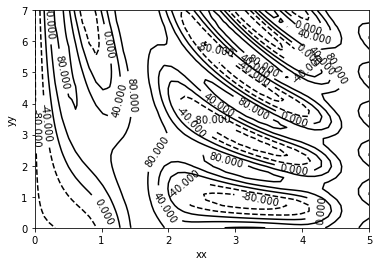

In [5]:
fig, ax = plt.subplots()

plot_cn = ax.contour(X, Y, Z, 5, colors='black')

ax.clabel(plot_cn, inline=True, fontsize=10)

#--- set X & Y labels
ax.set_xlabel("xx")
ax.set_ylabel("yy")
